In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
accident_data = pd.read_csv('data-cleaned.csv')

In [3]:
accident_data = accident_data.drop('District_Area', axis=1)
X = accident_data.drop('Accident_Severity', axis=1)
y=accident_data['Accident_Severity']


In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [12]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(multi_class='multinomial', max_iter=1000)
logisticReg.fit(train_X, train_y)
yhat_test = logisticReg.predict(test_X)
yhat_train = logisticReg.predict(train_X)
print(classification_report(test_y, yhat_test))
print(classification_report(train_y, yhat_train))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92    108672
           1       0.27      0.00      0.00     17222
           2       0.12      0.00      0.00      1711

    accuracy                           0.85    127605
   macro avg       0.42      0.33      0.31    127605
weighted avg       0.76      0.85      0.78    127605

              precision    recall  f1-score   support

           0       0.85      1.00      0.92    434965
           1       0.43      0.00      0.00     68696
           2       0.30      0.00      0.00      6759

    accuracy                           0.85    510420
   macro avg       0.53      0.33      0.31    510420
weighted avg       0.79      0.85      0.78    510420



In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, yhat_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.18877786920575212


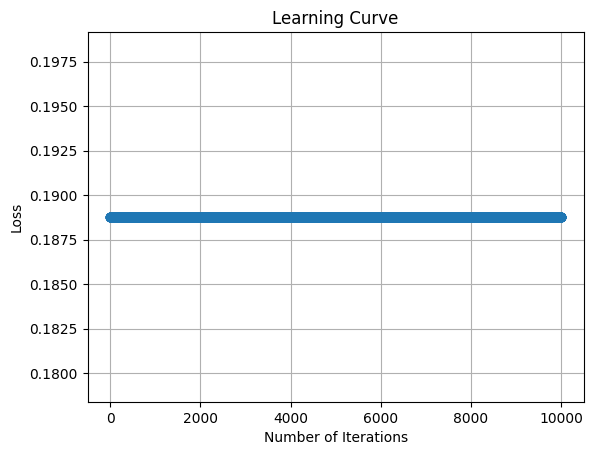

In [14]:
import matplotlib.pyplot as plt

# Train the model and collect loss values
loss_values = []  # Collect loss values during training

# Assuming you have a loop for training iterations
for iteration in range(10000):
    # Perform one iteration of training and collect the loss
    loss = mean_squared_error(test_y, yhat_test)
    loss_values.append(loss)  # Append the loss to the list

# Plot the learning curve
plt.plot(range(1, 10000 + 1), loss_values, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(True)
plt.show()


<Axes: >

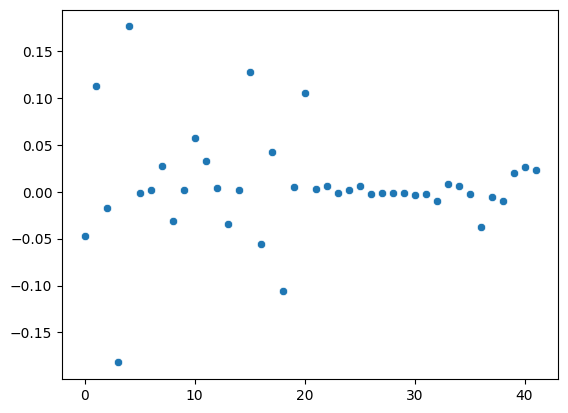

In [15]:
sns.scatterplot(x = list(range(0,len(logisticReg.coef_[0]))),y = logisticReg.coef_[0])